<a href="https://colab.research.google.com/github/KavishaMadani/machine-learning/blob/main/PCA_and_Gaussian_Mixture_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Student name : Kavisha Madani
## Seat No : 202318007

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Loaded images shape: (400, 112, 92)
Loaded labels shape: (400,)


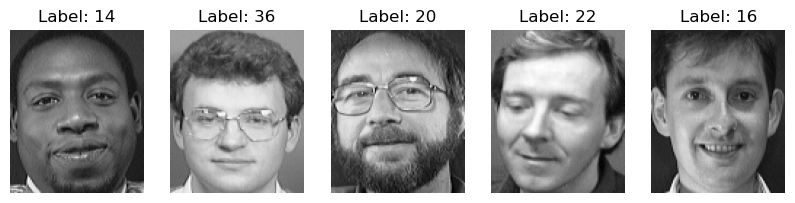

In [ ]:
def load_orl_dataset(data_dir):
    images = []
    labels = []
    label_dict = {}
    label_counter = 0

    for person_id in os.listdir(data_dir):
        person_dir = os.path.join(data_dir, person_id)
        if os.path.isdir(person_dir):
            label_dict[person_id] = label_counter
            label_counter += 1
            for image_name in os.listdir(person_dir):
                image_path = os.path.join(person_dir, image_name)
                if image_name.endswith('.pgm') or image_name.endswith('.jpg'):
                    image = Image.open(image_path)
                    image = np.array(image)
                    images.append(image)
                    labels.append(label_dict[person_id])

    # Convert lists to arrays
    images = np.array(images)
    labels = np.array(labels)

    # Shuffle the dataset
    permutation = np.random.permutation(len(images))
    images = images[permutation]
    labels = labels[permutation]

    return images, labels

data_dir = "orldataset"
X, y = load_orl_dataset(data_dir)
print("Loaded images shape:", X.shape)
print("Loaded labels shape:", y.shape)

# Print a few images
print_images(X, y)

# ![image.png](attachment:image.png)

In [ ]:
mean_face = np.mean(X, axis=0)
X_centered = X - mean_face
X_centered_reshaped = X_centered.reshape(X_centered.shape[0], -1)
S = np.cov(X_centered_reshaped.T)
print("Sample covariance matrix shape:", S.shape)

Sample covariance matrix shape: (10304, 10304)


# ![image.png](attachment:image.png)

In [ ]:
from scipy.linalg import eigh

eigenvalues, eigenvectors = eigh(S)

idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

U = eigenvectors
print("Matrix U shape:", U.shape)

Matrix U shape: (10304, 10304)


# ![image.png](attachment:image.png)

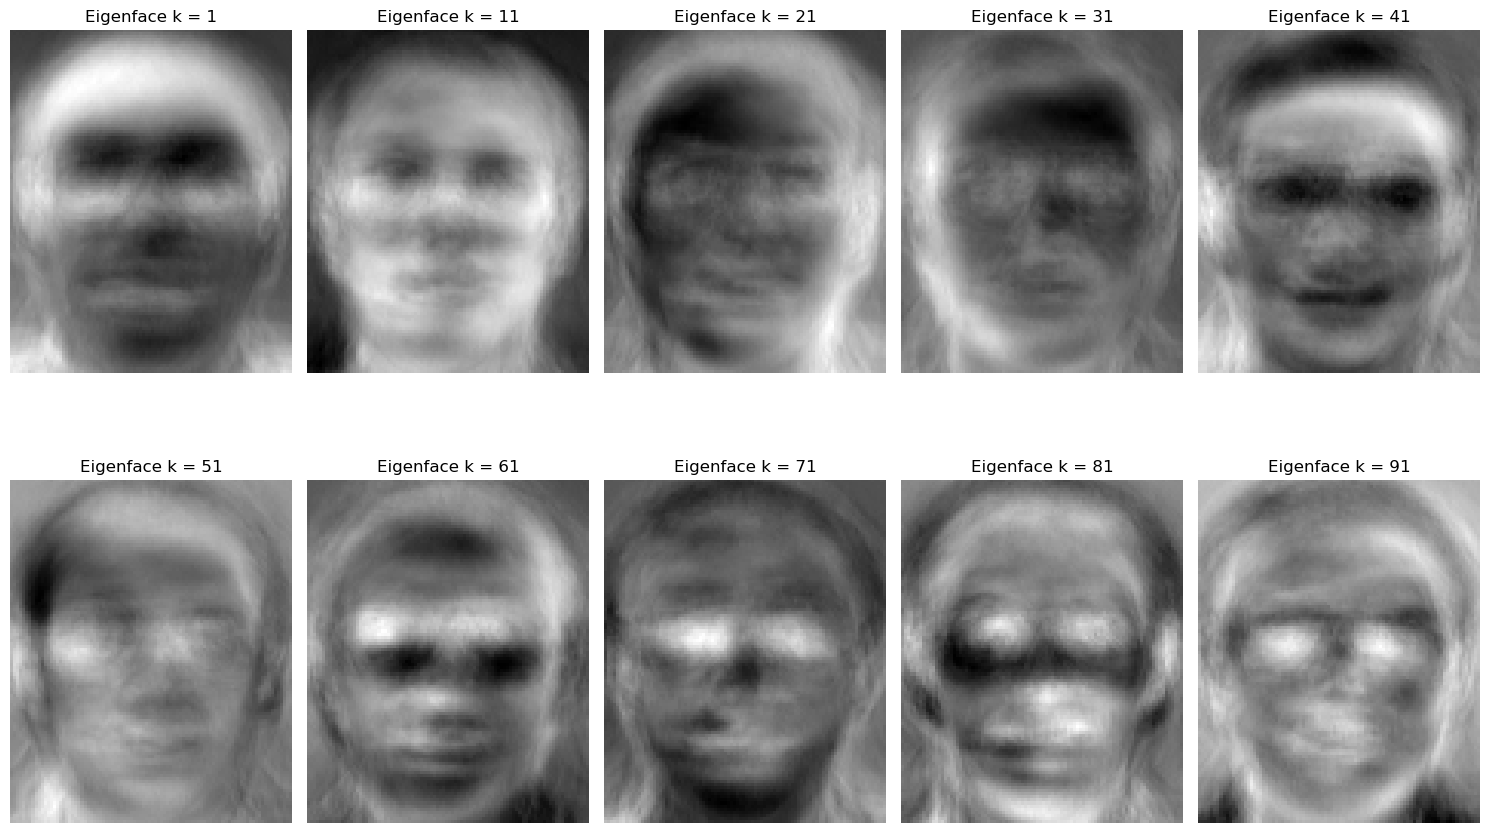

In [ ]:
def visualize_eigenfaces(U, mean_face, k_values):
    num_cols = 5
    num_rows = (len(k_values) + num_cols - 1) // num_cols
    plt.figure(figsize=(15, 10))

    for i, k in enumerate(k_values, start=1):
        eigenface = U[:, i]
        eigenface = eigenface.reshape(mean_face.shape)

        plt.subplot(num_rows, num_cols, i)
        plt.imshow(eigenface, cmap='gray')
        plt.title(f"Eigenface k = {k}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Define k values for visualization
k_values = range(1, 101, 10)

# Visualize eigenfaces for the specified k values
visualize_eigenfaces(U, mean_face, k_values)

# ![image.png](attachment:image.png)

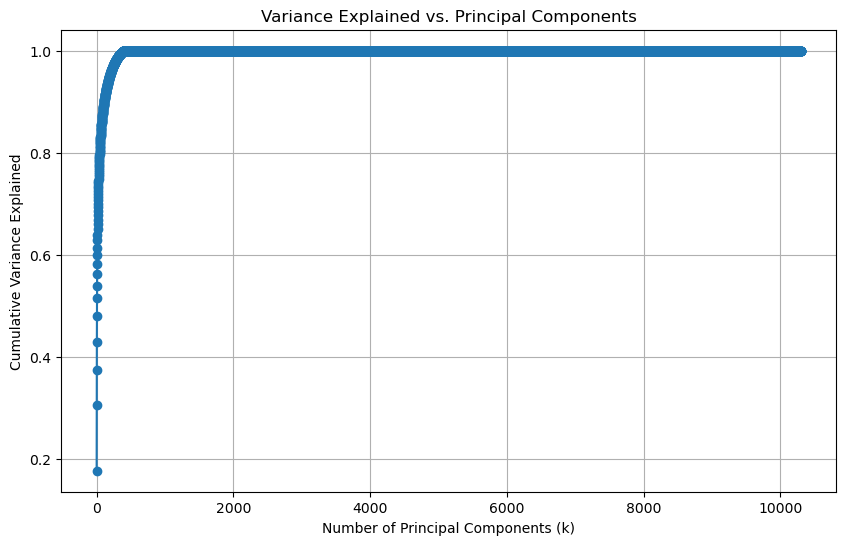

In [ ]:
def plot_variance_vs_components(eigenvalues):
    total_variance = np.sum(eigenvalues)
    variance_explained = np.cumsum(eigenvalues) / total_variance
    num_components = len(eigenvalues)
    components = np.arange(1, num_components + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(components, variance_explained, marker='o', linestyle='-')
    plt.title('Variance Explained vs. Principal Components')
    plt.xlabel('Number of Principal Components (k)')
    plt.ylabel('Cumulative Variance Explained')
    plt.grid(True)
    plt.show()

    return variance_explained

variance_explained = plot_variance_vs_components(eigenvalues)

# ![image.png](attachment:image.png)

In [ ]:
def obtain_low_dimensional_representation(U, X_centered, k_values):
    V_values = []

    for k in k_values:
        U_k = U[:, :k]
        V = np.dot(U_k.T, X_centered.T)
        V_values.append(V.T)

    return V_values

k_values = range(1, X.shape[0] + 1, 100)
V_values = obtain_low_dimensional_representation(U, X_centered_reshaped, k_values)

# ![image.png](attachment:image.png)

# ![image.png](attachment:image.png)

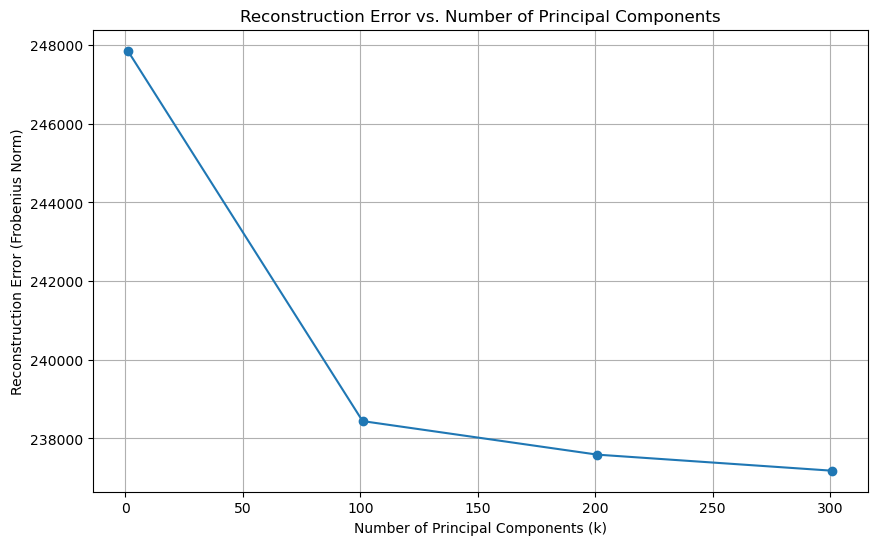

In [ ]:
def obtain_low_dimensional_representation(U, X_centered, k_values):
    V_values = []

    for k in k_values:
        U_k = U[:, :k]
        V = np.dot(U_k.T, X_centered.T)
        V_values.append(V.T)

    return V_values

k_values = range(1, X.shape[0] + 1, 100)
V_values = obtain_low_dimensional_representation(U, X_centered_reshaped, k_values)

def calculate_reconstruction_error(original, reconstructed):
    diff = original - reconstructed

    error = np.linalg.norm(diff)

    return error

reconstruction_errors = []
for V in V_values:
    U_k = U[:, :V.shape[1]]
    X_reconstructed = np.dot(V, U_k.T)
    X_reconstructed = X_reconstructed.reshape(X.shape)
    error = calculate_reconstruction_error(X, X_reconstructed)
    reconstruction_errors.append(error)

plt.figure(figsize=(10, 6))
plt.plot(k_values, reconstruction_errors, marker='o', linestyle='-')
plt.title('Reconstruction Error vs. Number of Principal Components')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Reconstruction Error (Frobenius Norm)')
plt.grid(True)
plt.show()

# ![image-2.png](attachment:image-2.png)

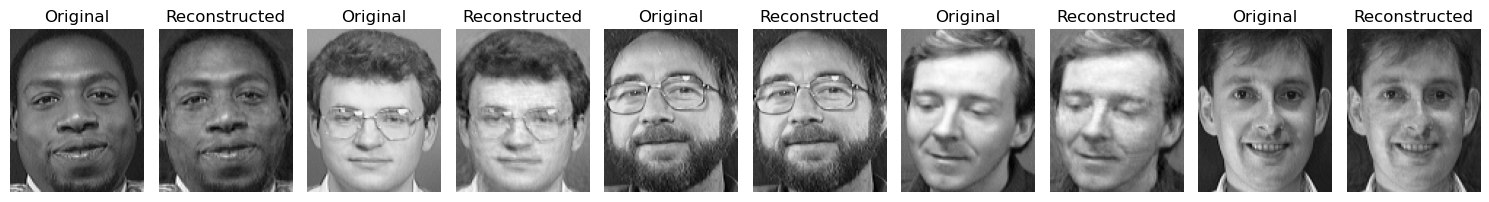

In [ ]:
def visualize_reconstructed_images(X, V_values, U, mean_face, num_images=5):
    num_cols = num_images * 2
    num_rows = 2
    plt.figure(figsize=(15, 5))

    for i in range(num_images):
        # Original Image
        plt.subplot(num_rows, num_cols, i*2 + 1)
        plt.imshow(X[i], cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed Image
        reconstructed_image = np.dot(V_values[-1][i], U[:, :V_values[-1].shape[1]].T)
        reconstructed_image = reconstructed_image.reshape(mean_face.shape)
        reconstructed_image += mean_face.reshape(mean_face.shape)

        plt.subplot(num_rows, num_cols, i*2 + 2)
        plt.imshow(reconstructed_image, cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

visualize_reconstructed_images(X, V_values, U, mean_face)

Optimal k: 101
Reconstruction error: 238441.13748627272
Variance loss: 0.10843381834581822


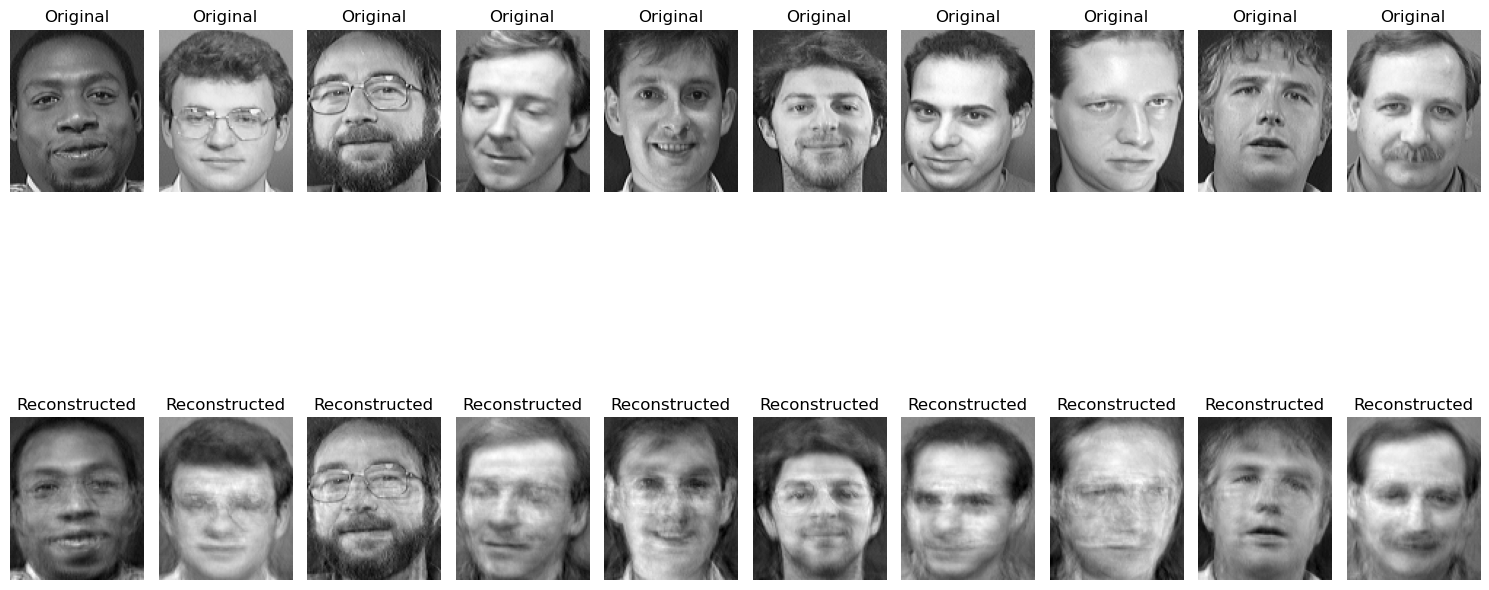

In [ ]:
optimal_k = 101
optimal_reconstruction_error = reconstruction_errors[k_values.index(optimal_k)]
optimal_variance_loss = 1 - variance_explained[optimal_k - 1]

print("Optimal k:", optimal_k)
print("Reconstruction error:", optimal_reconstruction_error)
print("Variance loss:", optimal_variance_loss)

num_images_to_show = 10

plt.figure(figsize=(15, 10))
for i in range(num_images_to_show):
    # Original Image
    plt.subplot(2, num_images_to_show, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed Image
    reconstructed_image = np.dot(V_values[k_values.index(optimal_k)][i], U[:, :optimal_k].T)
    reconstructed_image = reconstructed_image.reshape(mean_face.shape)
    reconstructed_image += mean_face.reshape(mean_face.shape)

    plt.subplot(2, num_images_to_show, num_images_to_show + i + 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()


# ![image.png](attachment:image.png)

In [ ]:
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


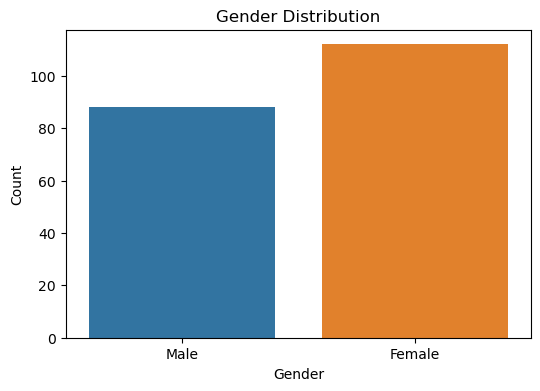

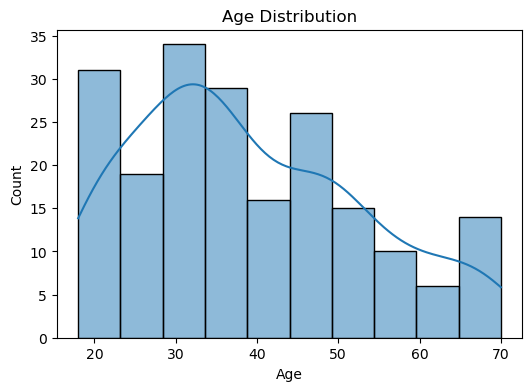

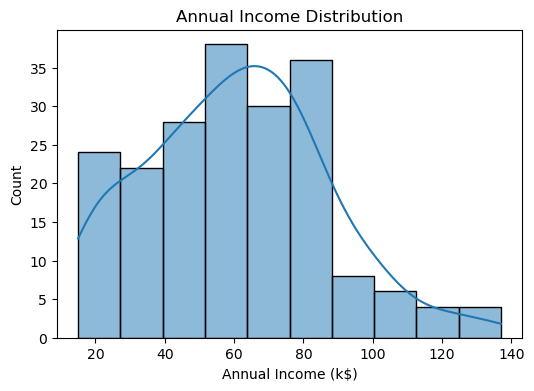

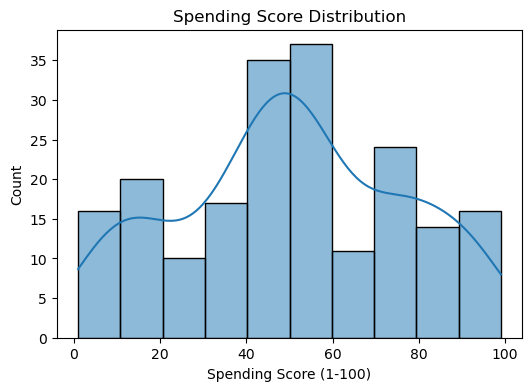

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualize Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualize Annual Income Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['Annual Income (k$)'], bins=10, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

# Visualize Spending Score Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['Spending Score (1-100)'], bins=10, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()


# ![image.png](attachment:image.png)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import warnings

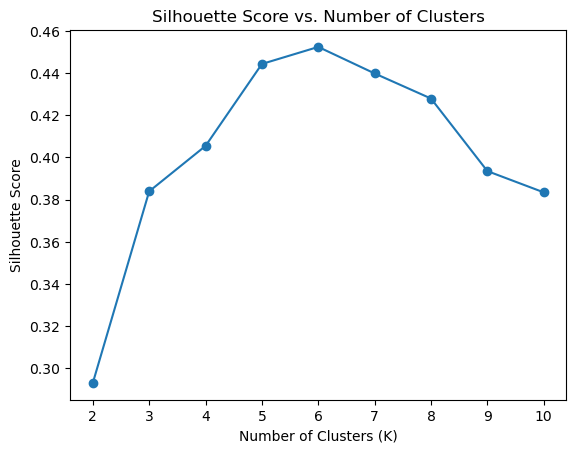

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)

os.environ["OMP_NUM_THREADS"] = "1"

X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
k_values = range(2, 11)

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', random_state=42, n_init=10)  # Explicitly set n_init to suppress FutureWarning

    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(k_values)
plt.show()

# ![image.png](attachment:image.png)

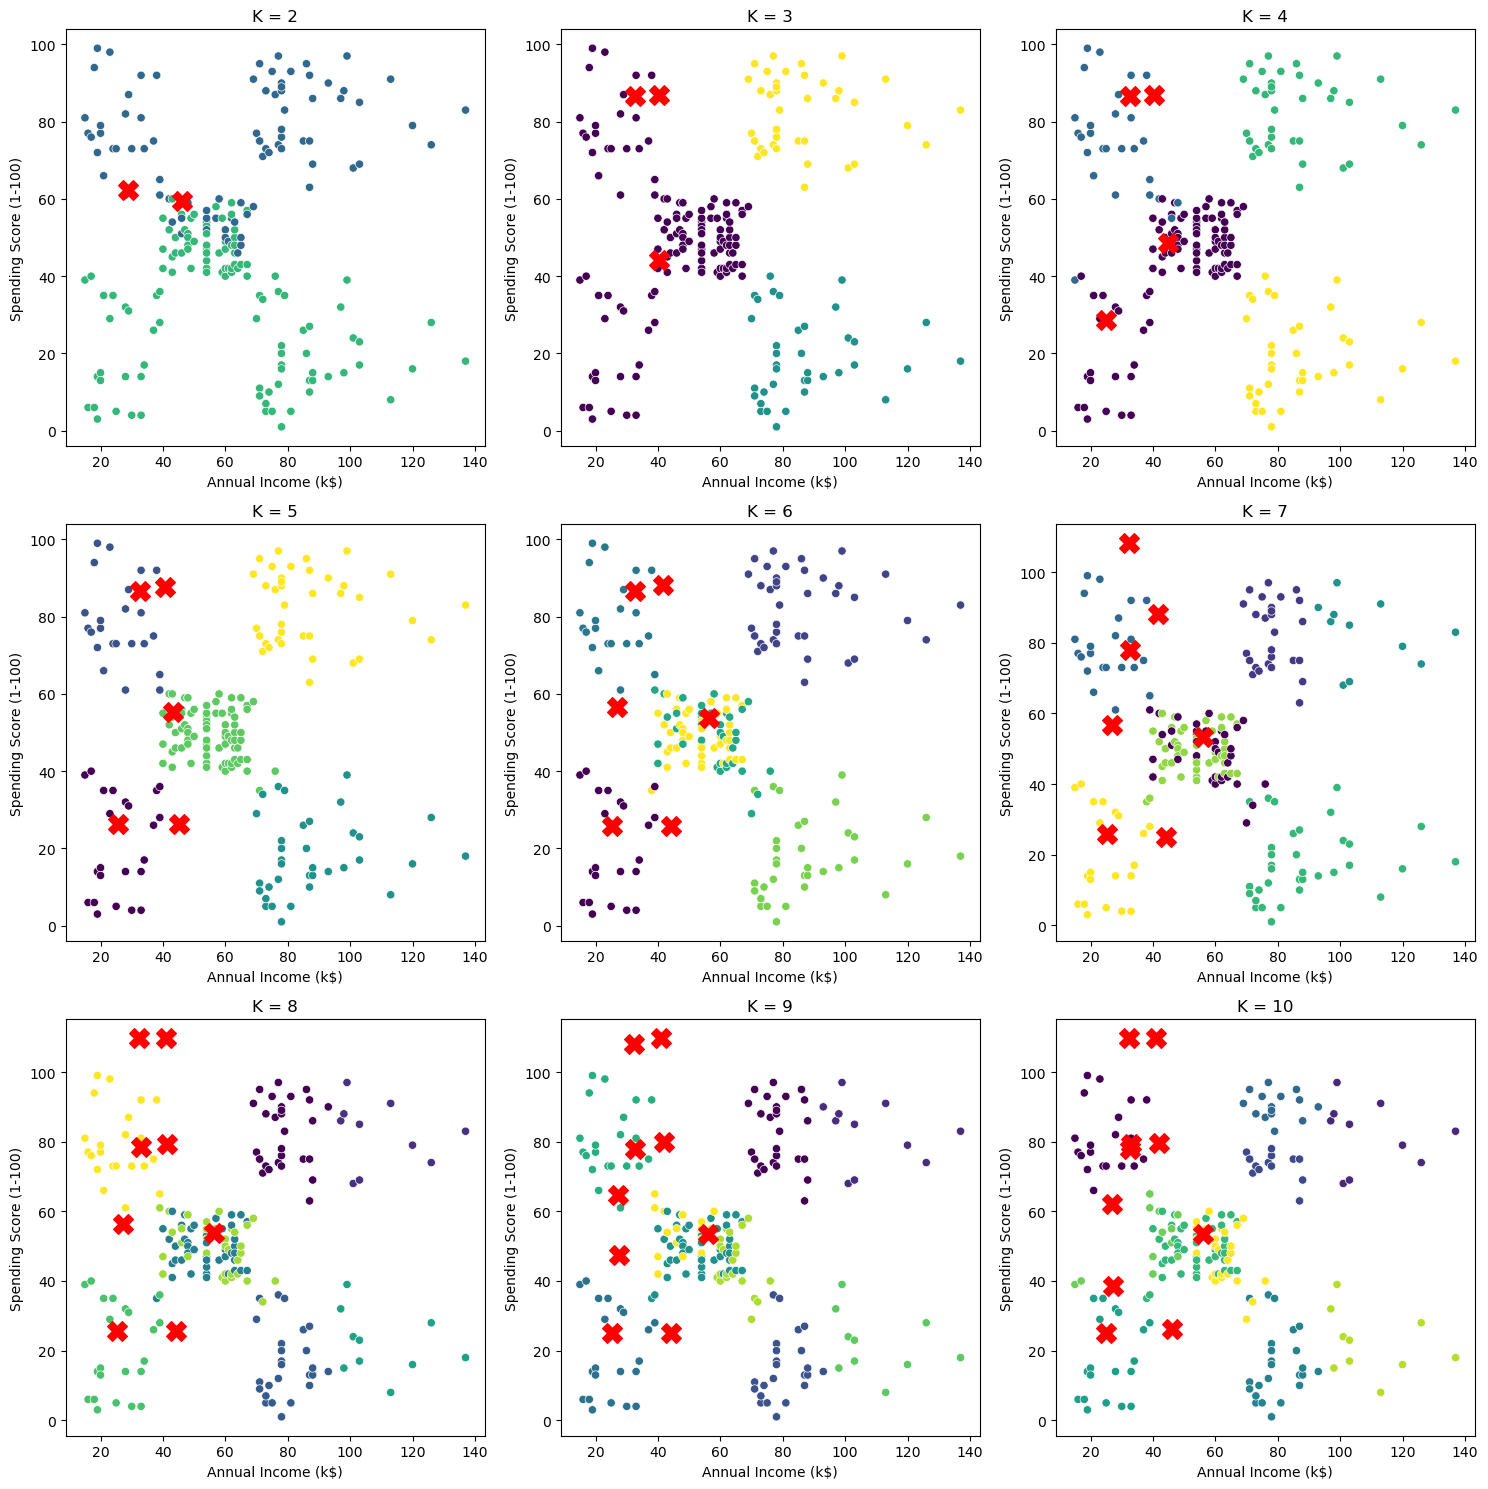

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

num_rows = len(k_values) // 3
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axs = axs.flatten()

# Perform K-means clustering and visualize clusters for each K value
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42, n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_
    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue=labels, ax=axs[i], palette='viridis', legend=False)

    cluster_centers = kmeans.cluster_centers_
    axs[i].scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, c='red')

    axs[i].set_title(f'K = {k}')

    axs[i].set_xlabel('Annual Income (k$)')
    axs[i].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

# ![image.png](attachment:image.png)


Optimal value of k:  5



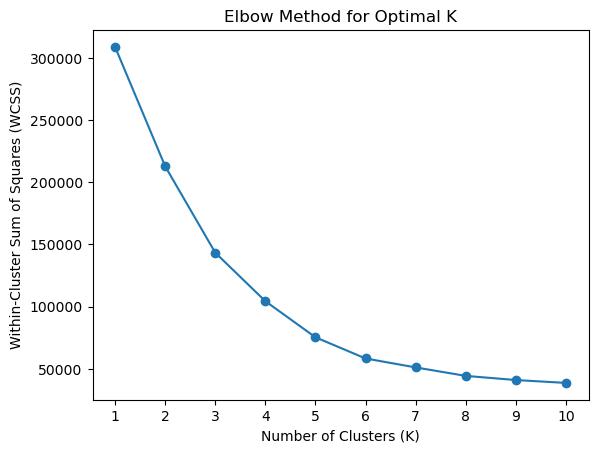

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

k_values = range(1, 11)

wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', random_state=42, n_init=10)

    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss = np.array(wcss)

wcss2 = wcss[:-1] / wcss[1:]
optimal_k =  wcss2[:-1] / wcss2[1:] * 100
optimal_k = np.argmax(optimal_k) + 1

print(f'\nOptimal value of k:  {optimal_k}\n')

plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.show()